In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("shoe_sales.csv")
print(df.shape)
df.head()
df.brand.unique()

(60, 3)


array(['Nike', 'Adidas'], dtype=object)

In [3]:
df_nike=df[df["brand"]=="Nike"]
print(df_nike.shape)
df_nike.head()

(30, 3)


,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [4]:
df_adidas=df[df["brand"]=="Adidas"]
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


## (1) Nike Analysis

In [5]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [6]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [7]:
df_nike["sold_qty"].quantile([0.95])

0.95    24.0
Name: sold_qty, dtype: float64

In [8]:
df_nike[df_nike["sold_qty"]>24.0] #no problem

,date,brand,sold_qty
16,9/9/2023,Nike,25.0


In [9]:
nike_med=round(df_nike.sold_qty.median())
nike_med

20

In [13]:
df_nike.fillna({"sold_qty":nike_med},inplace=True)
# or df_nike.sold_qty.fillna(nike_med,inplace=True)

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_6716\1544612810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.fillna({"sold_qty":nike_med},inplace=True)


In [14]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

## (2) Adidas Analysis

In [15]:
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [16]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [17]:
adidas_med=round(df_adidas["sold_qty"].median())
adidas_med

12

In [18]:
df_adidas[df_adidas["sold_qty"].isnull()] # no null values

,date,brand,sold_qty


In [19]:
df_adidas[df_adidas["sold_qty"].isnull()].sum()

date          0
brand         0
sold_qty    0.0
dtype: object

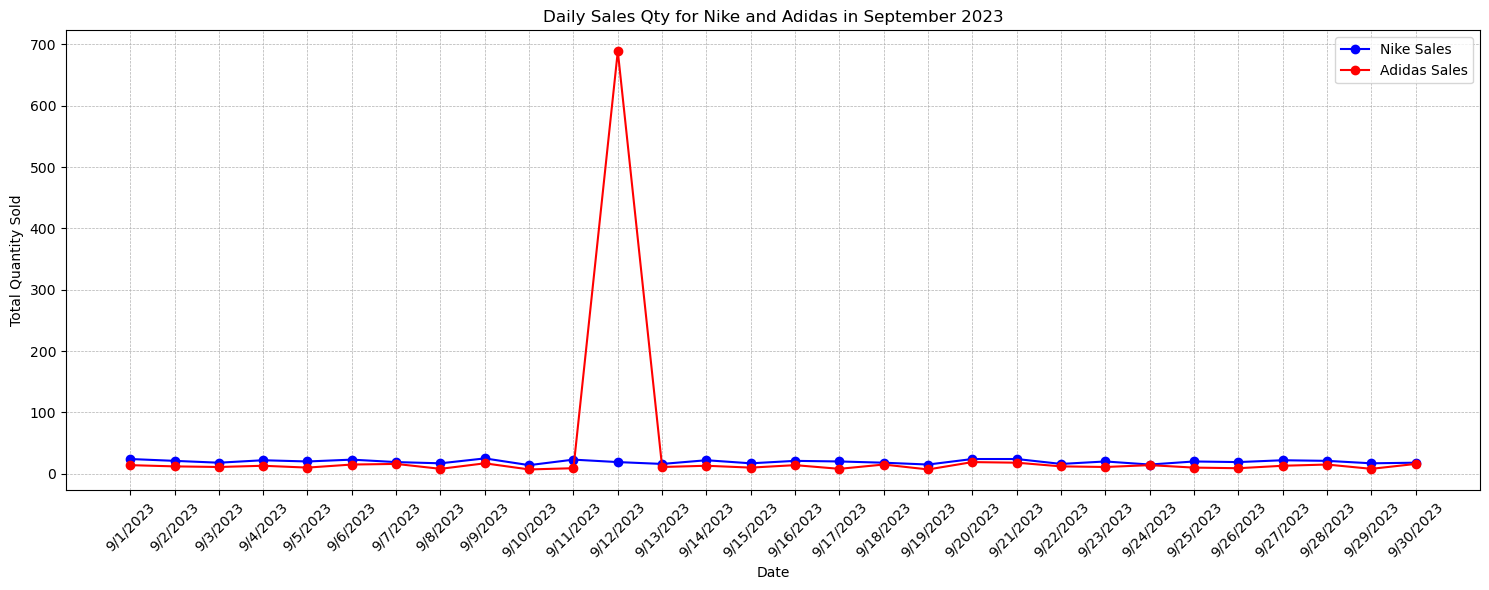

In [20]:
def plt_show():
    plt.figure(figsize=(15,6))
    dates=df_nike["date"]
    
    plt.plot(dates, df_nike["sold_qty"], marker="o", label="Nike Sales", color="blue")
    plt.plot(dates, df_adidas["sold_qty"], marker="o", label="Adidas Sales", color="red")
    plt.title("Daily Sales Qty for Nike and Adidas in September 2023")
    plt.xlabel("Date")
    plt.ylabel("Total Quantity Sold")
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True,which="both",linestyle="--",linewidth=0.5)
    plt.legend()
    plt.show()

plt_show()

In [19]:
df_adidas.sold_qty.quantile([0.95])

0.95    18.55
Name: sold_qty, dtype: float64

In [20]:
df_adidas[df_adidas["sold_qty"]>18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


In [21]:
df_adidas["sold_qty"].replace(689,adidas_med,inplace=True)

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_6716\3877836980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas["sold_qty"].replace(689,adidas_med,inplace=True)
C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_6716\3877836980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas["sold_qty"].replace(689,adidas

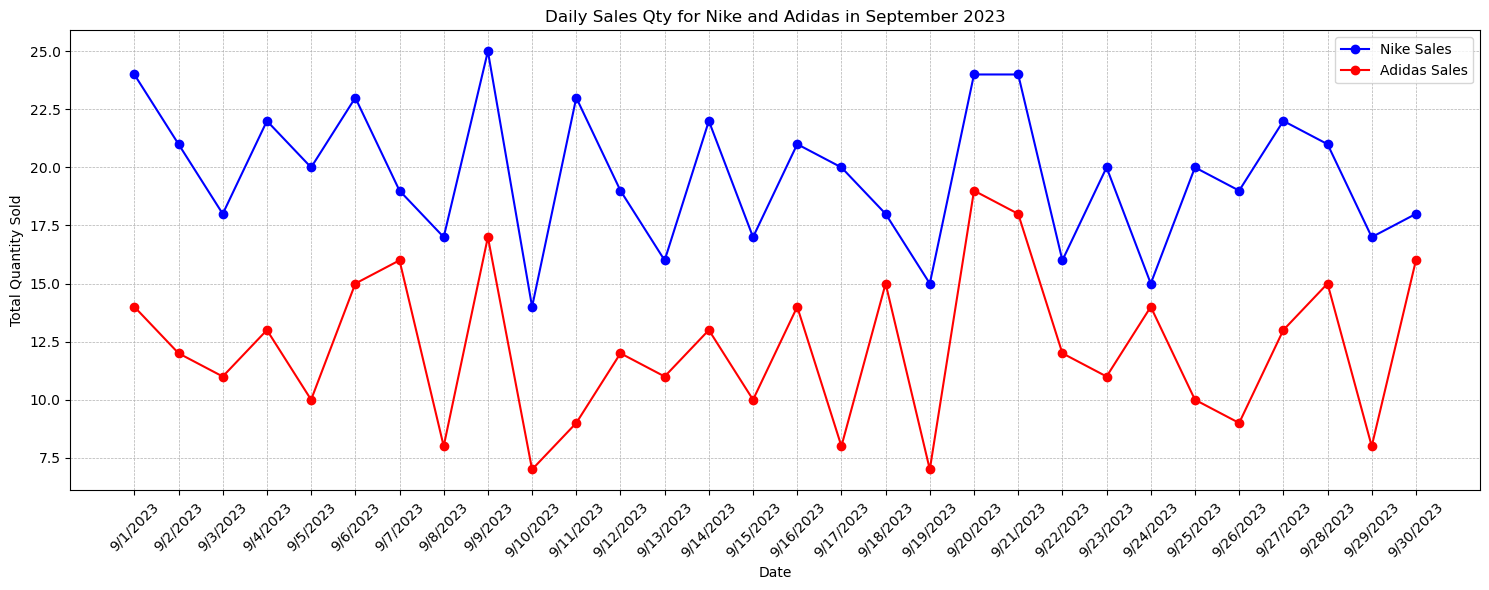

In [23]:
plt_show()